# Taxi Dataset Cleaning
Our overall plan in the data team, is to divide up the borough of manhattan into taxi zones and then from there, predict the busyness of each zone based on known factors. Therefore, the taxi trip data will play a pivotal part in our investigations. 
#  
## Combining the Datasets 
Datasets outlining trip information from btoh green and yellow taxi cab rides were sourced from TLC NYC. These trips took place from March 31st 2024 to January 1st 2022. 
Files were sourced in parquet form and must be read into pandas in order to be cleaned and analysed.

In [2]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# Initialize an empty list to collect dataframes
data_frames = []

# Iterate over the years and months in our range
for year in range(2022, 2024):
    for month in range(1, 13):
        # Making sure the month is two digit form
        month_str = str(month).zfill(2)
        
        # File names and directory
        yellow_file_name = f'yellow/yellow_tripdata_{year}-{month_str}.parquet'
        green_file_name = f'green/green_tripdata_{year}-{month_str}.parquet'
        
        # Try to read yellow tripdata files
        try:
            raw_yellow_partition = pq.read_table(yellow_file_name).to_pandas()
            raw_yellow_partition = raw_yellow_partition[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                                                         'passenger_count', 'PULocationID', 'DOLocationID']]
            data_frames.append(raw_yellow_partition)
            print(f"Successfully read file: {yellow_file_name}")
        except Exception as e:
            print(f"Could not read file: {yellow_file_name}. Error: {e}")

        # Try to read green tripdata files
        try:
            raw_green_partition = pq.read_table(green_file_name).to_pandas()
            raw_green_partition = raw_green_partition[['lpep_pickup_datetime', 'lpep_dropoff_datetime',
                                                       'passenger_count', 'PULocationID', 'DOLocationID']]
            # Rename columns to match the yellow tripdata
            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_pickup_datetime', 'tpep_pickup_datetime')
            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_dropoff_datetime', 'tpep_dropoff_datetime')
            data_frames.append(raw_green_partition)
            print(f"Successfully read file: {green_file_name}")
        except Exception as e:
            print(f"Could not read file: {green_file_name}. Error: {e}")

# Concatenate all dataframes in the list
if data_frames:
    combined_raw = pd.concat(data_frames, axis=0, ignore_index=True)
    print(f"Combined DataFrame shape: {combined_raw.shape}")
else:
    print("No data frames were successfully read.")

# Shape of the combined dataframe
combined_raw.shape

In [ ]:
combined_raw

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,142,236
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,236,42
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,166,166
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,114,68
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,68,163
...,...,...,...,...,...
89316144,2024-03-31 21:19:00,2024-03-31 21:30:00,NaN,25,61
89316145,2024-03-31 22:30:00,2024-03-31 22:35:00,NaN,41,42
89316146,2024-03-31 22:43:00,2024-03-31 22:48:00,NaN,223,7
89316147,2024-03-31 22:48:00,2024-03-31 23:12:00,NaN,42,249


# Clean the Data Set
## Check for Duplicate Rows

In [ ]:
# Clean duplicated rows
print('Number of duplicate (excluding original) rows is:', combined_raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', combined_raw[combined_raw.duplicated(keep=False)].shape[0])
# Show duplicate row data that can be dropped
combined_raw[combined_raw.duplicated(keep=False)]

Number of duplicate (excluding original) rows is: 562638
Number of duplicate rows (including first) in the table is: 1125262


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
154,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,132,265
155,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,132,265
521,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,152,48
522,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,152,48
523,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,50,265
...,...,...,...,...,...
79588492,2023-12-31 18:53:33,2023-12-31 18:54:26,1.0,75,75
79588666,2023-12-31 21:05:23,2023-12-31 21:06:40,1.0,166,166
79588667,2023-12-31 21:05:23,2023-12-31 21:06:40,1.0,166,166
79588828,2023-12-31 23:40:44,2023-12-31 23:41:22,1.0,41,41


By examining the duplicate rows, it just seems that they are indeed redundant duplicates. They are not seperate trips rather just a replica of eachother and can be discarded. 

In [ ]:
combined_raw = combined_raw.drop_duplicates()
print('Number of duplicate (excluding original) rows is:', combined_raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', combined_raw[combined_raw.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


# Combining the Drop Off and Pickup Locations 
We may combine the pickup and drop off locations together in order to improve our predictive accuracy. We are not interested in one over the other as they both tell us important information about the areas. 

Analyzing pickup locations helps understand commuting patterns, popular destinations, and areas of high activity, which can be correlated with events, attractions, or daily routines. Analyzing drop-off locations can help identify popular hotspots, areas of high tourist activity, and places with significant economic and social activity. By combining pickup and dropoff locations, we can analyze the overall taxi activity in Manhattan, including both the origins and destinations of trips, equally.

In [ ]:
pickup = combined_raw[['tpep_pickup_datetime',
                                            'passenger_count','PULocationID']]
pickup = pickup.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')

dropoff = combined_raw[['tpep_dropoff_datetime',
                                            'passenger_count','DOLocationID']]
dropoff = dropoff.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')


combined_raw = pd.concat([pickup,dropoff],axis=0)
combined_raw

,datetime,passenger_count,taxi_zone
0,2022-01-01 00:35:40,2.0,142
1,2022-01-01 00:33:43,1.0,236
2,2022-01-01 00:53:21,1.0,166
3,2022-01-01 00:25:21,1.0,114
4,2022-01-01 00:36:48,1.0,68
...,...,...,...
89316144,2024-03-31 21:30:00,NaN,61
89316145,2024-03-31 22:35:00,NaN,42
89316146,2024-03-31 22:48:00,NaN,7
89316147,2024-03-31 23:12:00,NaN,249


In [ ]:
 # check null value
combined_raw.isnull().sum()

datetime                 0
passenger_count    7167958
taxi_zone                0
dtype: int64

In [ ]:
# show date types
combined_raw.dtypes

datetime           datetime64[us]
passenger_count           float64
taxi_zone                   int64
dtype: object

In [ ]:
# Convert 'passenger_count' to float32
combined_raw['passenger_count'] = combined_raw['passenger_count'].astype('float32')
combined_raw['taxi_zone'] = combined_raw['taxi_zone'].astype('int16')
# show new date types
combined_raw.dtypes

datetime           datetime64[us]
passenger_count           float32
taxi_zone                   int16
dtype: object

In [ ]:
# Columns of type 'numeric' i.e. passenger_count
numeric_columns = combined_raw.select_dtypes(['float32']).columns

# Percentage of missing values column 
numeric_columns_missing  = 100 * (combined_raw[numeric_columns].isnull().sum()/combined_raw.shape[0])
# Store values in a df
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
passenger_count,4.042781


In [ ]:
# Cardinality column
numeric_columns_card = combined_raw[numeric_columns].nunique()
# Store the values in a df
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
passenger_count,10


In [ ]:
# Add missing values column
df_table_numeric = combined_raw[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
# In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
passenger_count,170134678.0,1.379035,0.921682,0.0,1.0,1.0,1.0,9.0,4.042781,10


In [ ]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (combined_raw[feature].max() - combined_raw[feature].min()))
    
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    # nlargest decide how many values show here. the code show top 15 values.
    print(combined_raw[feature].value_counts().nlargest(15), "\n\n\n")

passenger_count
----------

Range passenger_count is:  9.0
----------
Value  Number of Instances
passenger_count
1.0    127584720
2.0     25544034
3.0      6438662
4.0      3303836
0.0      2926732
5.0      2606242
6.0      1728050
8.0         1184
7.0          882
9.0          336
Name: count, dtype: int64 





In [ ]:
combined_raw.reset_index(drop=True).to_parquet("basic_taxi_df_1.1.parquet", index=False)

## Read in Semi Processed Data

In [16]:
df = pd.read_parquet("../datasets/processed/taxi_processed/basic_taxi_df_1.1.parquet")
display(df)

,datetime,passenger_count,taxi_zone
0,2022-01-01 00:35:40,2.0,142
1,2022-01-01 00:33:43,1.0,236
2,2022-01-01 00:53:21,1.0,166
3,2022-01-01 00:25:21,1.0,114
4,2022-01-01 00:36:48,1.0,68
...,...,...,...
177302631,2024-03-31 21:30:00,NaN,61
177302632,2024-03-31 22:35:00,NaN,42
177302633,2024-03-31 22:48:00,NaN,7
177302634,2024-03-31 23:12:00,NaN,249


In [4]:
# Display a sample of the DataFrame to ensure it's correctly reset
df.head()

,datetime,passenger_count,taxi_zone
0,2022-01-01 00:35:40,2.0,142
1,2022-01-01 00:33:43,1.0,236
2,2022-01-01 00:53:21,1.0,166
3,2022-01-01 00:25:21,1.0,114
4,2022-01-01 00:36:48,1.0,68


# Extract Year and Month

In [5]:
# Extract year and month
df['year_month'] = df['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
df['day'] = df['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
df['week'] = df['datetime'].dt.dayofweek

# Extract hour of the day
df['hour'] = df['datetime'].dt.hour

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['week'] = df['week'].apply(lambda x: days[x])

In [6]:
df

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
0,2022-01-01 00:35:40,2.0,142,2022-01,1,Saturday,0
1,2022-01-01 00:33:43,1.0,236,2022-01,1,Saturday,0
2,2022-01-01 00:53:21,1.0,166,2022-01,1,Saturday,0
3,2022-01-01 00:25:21,1.0,114,2022-01,1,Saturday,0
4,2022-01-01 00:36:48,1.0,68,2022-01,1,Saturday,0
...,...,...,...,...,...,...,...
177302631,2024-03-31 21:30:00,NaN,61,2024-03,31,Sunday,21
177302632,2024-03-31 22:35:00,NaN,42,2024-03,31,Sunday,22
177302633,2024-03-31 22:48:00,NaN,7,2024-03,31,Sunday,22
177302634,2024-03-31 23:12:00,NaN,249,2024-03,31,Sunday,23


In [7]:
# set categorical types
df['taxi_zone'] = df['taxi_zone'].astype('category')
df['year_month'] = df['year_month'].astype('category')
df['day'] = df['day'].astype('category')
df['week'] = df['week'].astype('category')
df['hour'] = df['hour'].astype('category')
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['taxi_zone', 'year_month', 'day', 'week', 'hour'], dtype='object')

In [8]:
df[category_columns].describe().T

,count,unique,top,freq
taxi_zone,177302636,263,237,7685713
year_month,177302636,39,2022-10,7443845
day,177302636,31,14,6236918
week,177302636,7,Thursday,27699505
hour,177302636,24,18,12755323


In [9]:
# check null value
df.isnull().sum()

datetime                 0
passenger_count    7167958
taxi_zone                0
year_month               0
day                      0
week                     0
hour                     0
dtype: int64

In [8]:
#Plot histograms of the numeric features 
numeric_columns = df.select_dtypes(['float32']).columns

''

<Figure size 640x480 with 0 Axes>

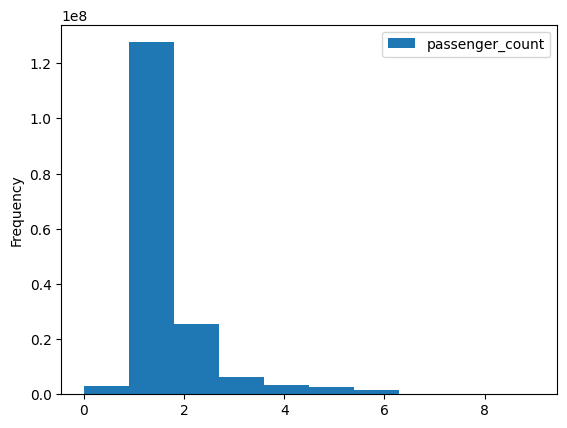

In [10]:
plt.figure()
df[numeric_columns].plot(kind='hist')
# plt.savefig('continuous_histograms.pdf')
;

passenger_count    Axes(0.125,0.77;0.168478x0.11)
dtype: object

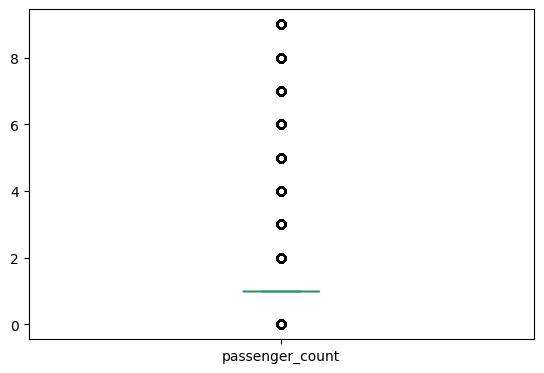

In [12]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)

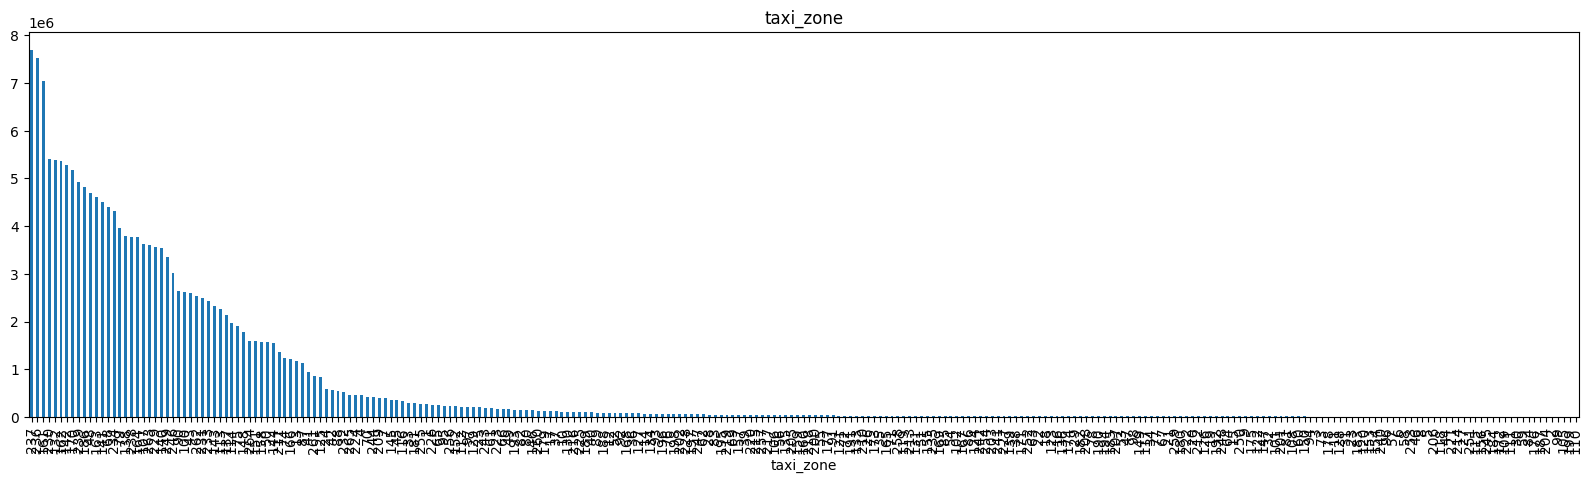

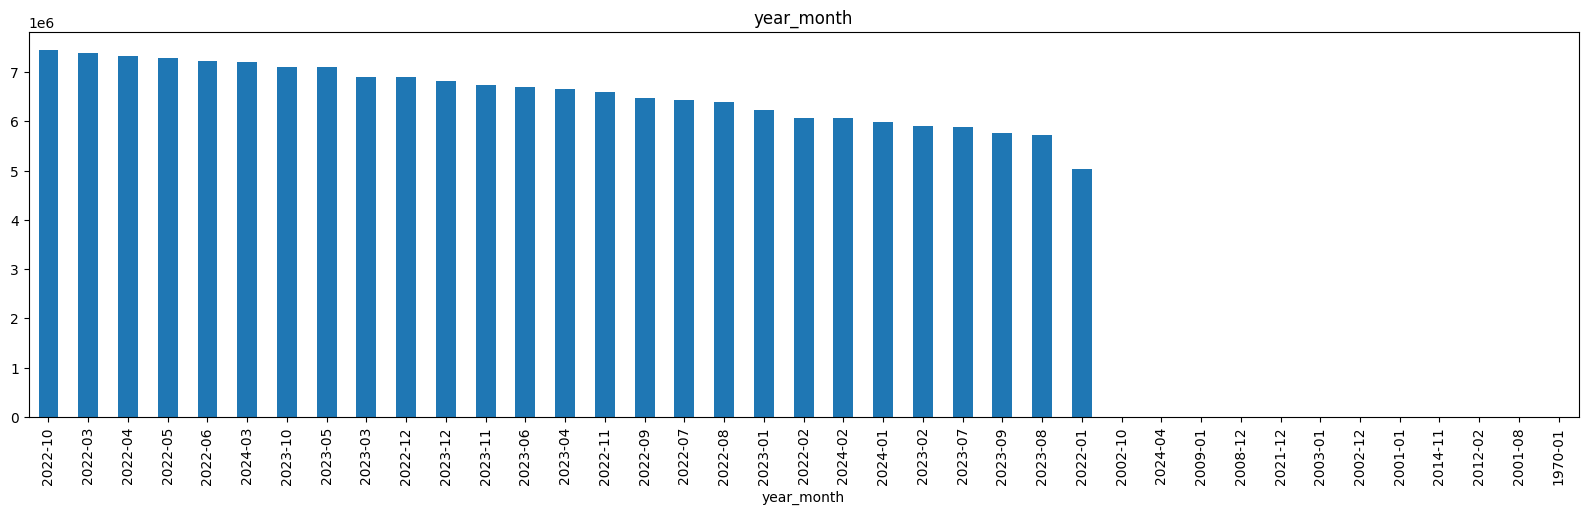

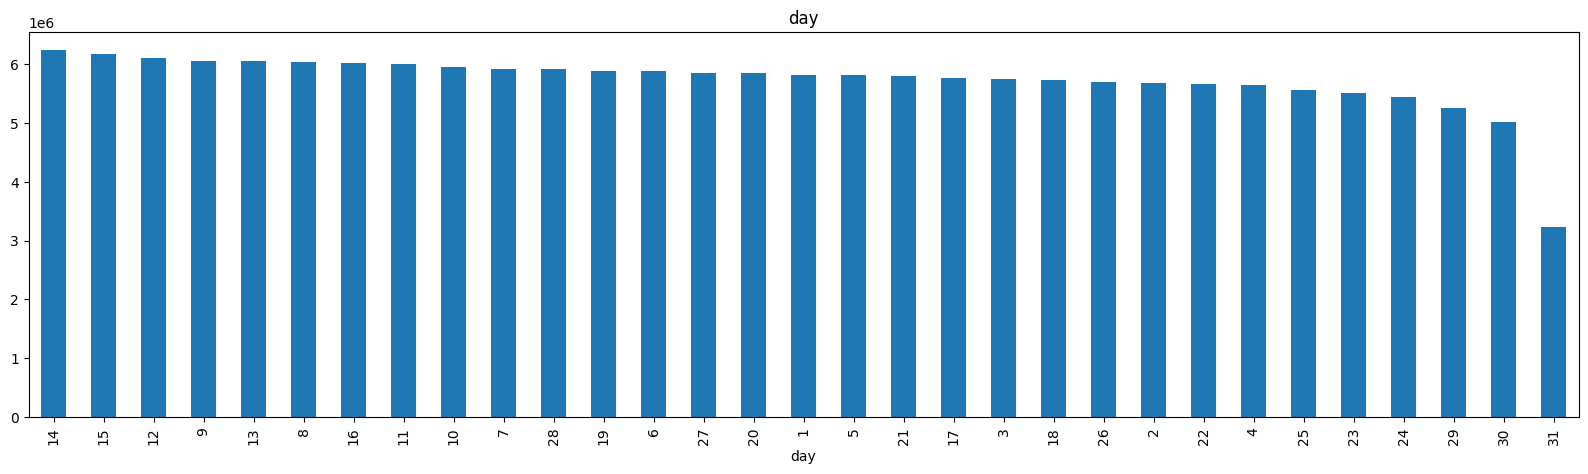

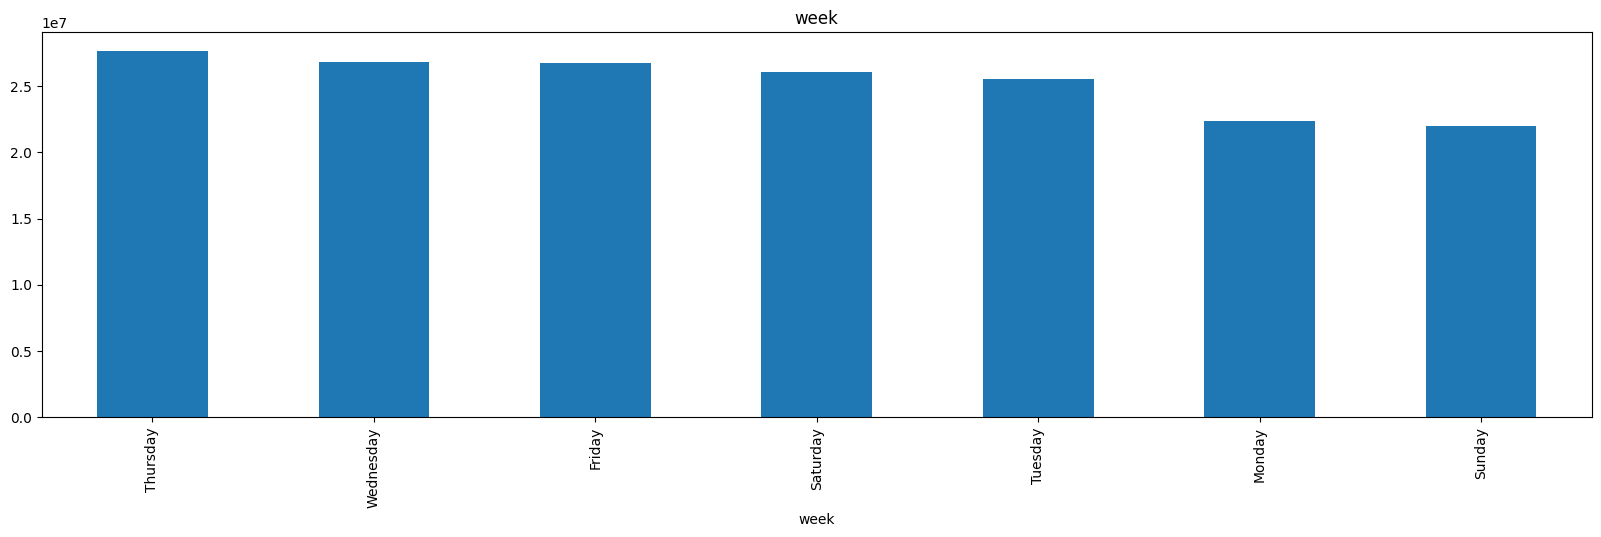

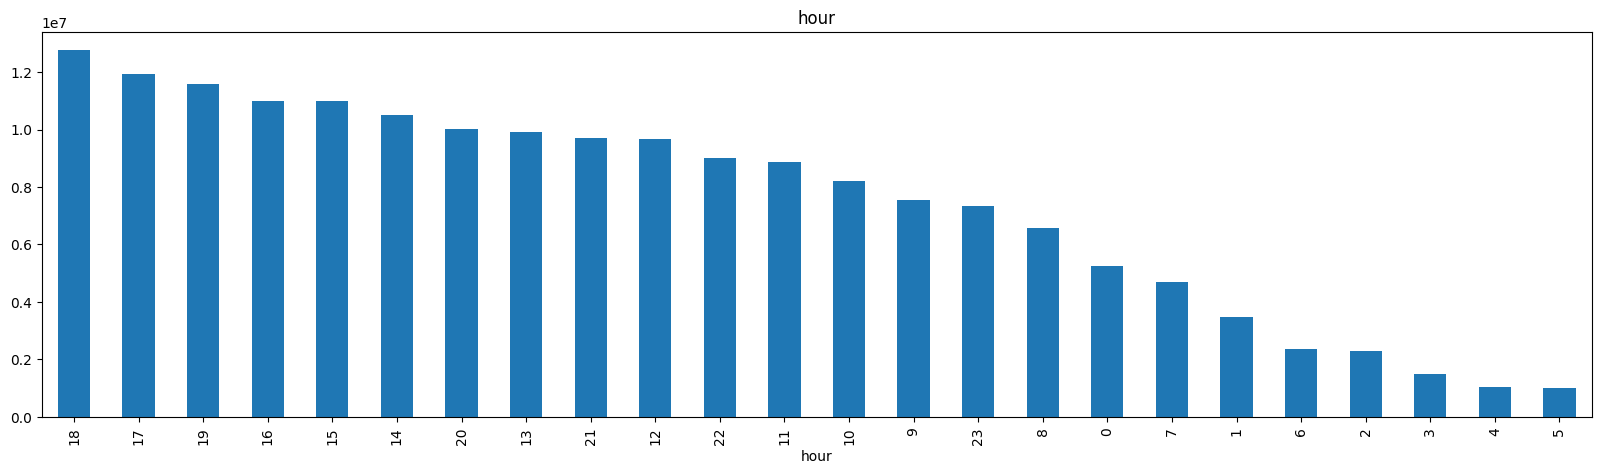

In [13]:
# Plot bar plots for all the catagorical features
for col in category_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(20,5))
    plt.title(col)
#         pp.savefig(f.get_figure())
    plt.show()

## Dealing with Passenger Nulls

From the above graphs, it would be far to assume that majority of journeys did only contain one passenger. As we are only missing around 4% of all passenger count data, I believe it would be fair to replace all null values with the median value. 

In [10]:
# Replace missing value with reasonable estimate -- median.
median_passenger_count = df['passenger_count'].median()
median_passenger_count
df['passenger_count'] = df['passenger_count'].replace(np.nan, median_passenger_count)

In [11]:
# Check the missing value
missing_case_passenger_count = df[df['passenger_count'].isnull()]
missing_case_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour


In [16]:
# Check the rows of 0 value.
zero_value_passenger_count = df[df['passenger_count'] == 0]
zero_value_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
143,2022-01-01 00:17:34,0.0,236,2022-01,1,Saturday,0
144,2022-01-01 00:23:57,0.0,263,2022-01,1,Saturday,0
145,2022-01-01 00:31:53,0.0,140,2022-01,1,Saturday,0
146,2022-01-01 00:41:40,0.0,163,2022-01,1,Saturday,0
156,2022-01-01 00:55:36,0.0,162,2022-01,1,Saturday,0
...,...,...,...,...,...,...,...
177300059,2024-03-31 17:32:25,0.0,236,2024-03,31,Sunday,17
177300060,2024-03-31 18:02:53,0.0,42,2024-03,31,Sunday,18
177300114,2024-03-31 18:09:51,0.0,56,2024-03,31,Sunday,18
177300150,2024-03-31 18:50:35,0.0,41,2024-03,31,Sunday,18


In [12]:
df['passenger_count'] = df['passenger_count'].replace(0, median_passenger_count)

In [13]:
# Check the rows of 0 value have been dropped.
zero_value_passenger_count = df[df['passenger_count'] == 0]
zero_value_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour


In [14]:
# Check the rows of for times/months not in our range
month_list = ["2023-12","2023-11","2023-10","2023-09","2023-08","2023-07","2023-05","2023-04", "2023-03", "2023-02", "2023-01", "2022-12", "2022-11","2022-10","2022-9", "2022-8", "2022-7",
             "2022-6","2022-5", "2022-4","2022-3","2022-2","2022-1",]
out_range_month = df[~df['year_month'].isin(month_list)]

out_range_month

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
932,2021-12-31 23:52:28,1.0,238,2021-12,31,Friday,23
1020,2021-12-31 23:59:23,2.0,79,2021-12,31,Friday,23
1041,2021-12-31 23:57:54,1.0,148,2021-12,31,Friday,23
1281,2021-12-31 23:57:35,2.0,249,2021-12,31,Friday,23
1432,2021-12-31 23:58:55,1.0,137,2021-12,31,Friday,23
...,...,...,...,...,...,...,...
177302631,2024-03-31 21:30:00,1.0,61,2024-03,31,Sunday,21
177302632,2024-03-31 22:35:00,1.0,42,2024-03,31,Sunday,22
177302633,2024-03-31 22:48:00,1.0,7,2024-03,31,Sunday,22
177302634,2024-03-31 23:12:00,1.0,249,2024-03,31,Sunday,23


In [15]:
# Drop miss match value rows.
df = df.drop(out_range_month.index)

In [16]:
print("taxi_zone: ", df['taxi_zone'].unique().tolist(), "\n")
print("year_month: ", df['year_month'].unique().tolist(), "\n")
print("week: ", df['week'].unique().tolist(), "\n")
print("hour: ", df['hour'].unique().tolist(), "\n")
print("day: ", df['day'].unique().tolist(), "\n")
print("passenger_count: ", df['passenger_count'].unique().tolist(), "\n")

taxi_zone:  [142, 236, 166, 114, 68, 138, 233, 238, 141, 234, 246, 43, 239, 148, 237, 7, 107, 263, 161, 79, 170, 162, 4, 262, 249, 132, 137, 90, 45, 70, 48, 211, 113, 164, 50, 265, 88, 186, 144, 224, 95, 24, 158, 74, 140, 163, 75, 229, 209, 264, 219, 232, 151, 256, 231, 87, 116, 65, 188, 42, 13, 33, 41, 220, 146, 100, 261, 125, 152, 127, 143, 243, 66, 260, 181, 195, 112, 129, 10, 226, 25, 255, 244, 12, 168, 230, 189, 97, 82, 190, 52, 49, 61, 145, 223, 202, 228, 179, 36, 40, 159, 80, 17, 167, 208, 69, 254, 213, 193, 77, 37, 225, 171, 106, 93, 247, 165, 117, 212, 250, 14, 157, 198, 83, 169, 136, 217, 173, 123, 160, 3, 1, 76, 89, 22, 39, 86, 18, 28, 252, 227, 135, 91, 124, 38, 216, 119, 205, 81, 122, 194, 92, 133, 35, 134, 177, 215, 147, 248, 63, 47, 210, 197, 201, 131, 200, 56, 5, 130, 191, 85, 218, 51, 46, 149, 241, 139, 235, 71, 102, 62, 174, 72, 182, 11, 29, 183, 67, 155, 54, 196, 8, 175, 55, 53, 64, 180, 34, 60, 120, 44, 257, 78, 207, 242, 184, 153, 185, 15, 19, 26, 258, 121, 57, 203

In [17]:
df.dtypes

datetime           datetime64[ns]
passenger_count           float32
taxi_zone                category
year_month               category
day                      category
week                     category
hour                     category
dtype: object

In [21]:
df

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
0,2022-01-01 00:00:00,2.0,142,2022-01,1,Saturday,0
1,2022-01-01 00:00:00,1.0,236,2022-01,1,Saturday,0
2,2022-01-01 00:00:00,1.0,166,2022-01,1,Saturday,0
3,2022-01-01 00:00:00,1.0,114,2022-01,1,Saturday,0
4,2022-01-01 00:00:00,1.0,68,2022-01,1,Saturday,0
...,...,...,...,...,...,...,...
167682834,2023-12-31 23:00:00,2.0,68,2023-12,31,Sunday,23
167683214,2023-12-31 23:00:00,1.0,246,2023-12,31,Sunday,23
167685620,2023-12-31 23:00:00,2.0,137,2023-12,31,Sunday,23
170616070,2023-12-31 14:00:00,1.0,65,2023-12,31,Sunday,14


# Group the passenger number together by the hour

In [18]:
# ignore the minutes and seconds
df['datetime'] = df['datetime'].dt.floor('h')

C:\Users\natha\AppData\Local\Temp\ipykernel_30376\1731885071.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['datetime'] = df['datetime'].dt.floor('H')


In [19]:
df_grouped = df.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()

C:\Users\natha\AppData\Local\Temp\ipykernel_30376\3554122049.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()


In [20]:
df_grouped

,taxi_zone,datetime,passenger_count
0,1,2022-01-01 00:00:00,0.0
1,1,2022-01-01 01:00:00,0.0
2,1,2022-01-01 02:00:00,2.0
3,1,2022-01-01 03:00:00,1.0
4,1,2022-01-01 04:00:00,8.0
...,...,...,...
4418395,265,2023-12-31 19:00:00,40.0
4418396,265,2023-12-31 20:00:00,30.0
4418397,265,2023-12-31 21:00:00,64.0
4418398,265,2023-12-31 22:00:00,82.0


In [22]:
df_grouped.reset_index(drop=True).to_parquet("basic_taxi_df_grouped.parquet", index=False)

## Read in Grouped Dataset

In [17]:
df_grouped = pd.read_parquet("../datasets/processed/taxi_processed/basic_taxi_df_grouped.parquet")

In [18]:
df_grouped

,taxi_zone,datetime,passenger_count
0,1,2022-01-01 00:00:00,0.0
1,1,2022-01-01 01:00:00,0.0
2,1,2022-01-01 02:00:00,2.0
3,1,2022-01-01 03:00:00,1.0
4,1,2022-01-01 04:00:00,8.0
...,...,...,...
4418395,265,2023-12-31 19:00:00,40.0
4418396,265,2023-12-31 20:00:00,30.0
4418397,265,2023-12-31 21:00:00,64.0
4418398,265,2023-12-31 22:00:00,82.0


In [3]:
uber = pd.read_parquet("fhvhv_tripdata_2024-02.parquet")

In [4]:
uber

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-02-01 00:13:55,2024-02-01 00:19:59,2024-02-01 00:20:54,2024-02-01 00:27:54,149,210,1.230,...,0.79,0.00,0.0,0.00,5.57,N,N,N,N,N
1,HV0003,B03404,B03404,2024-02-01 00:00:14,2024-02-01 00:03:28,2024-02-01 00:04:37,2024-02-01 00:09:37,127,136,1.280,...,0.70,0.00,0.0,0.00,5.39,N,N,N,N,N
2,HV0003,B03404,B03404,2024-02-01 00:13:57,2024-02-01 00:15:44,2024-02-01 00:17:46,2024-02-01 00:31:54,127,69,3.930,...,1.56,0.00,0.0,0.00,13.13,N,N,N,N,N
3,HV0005,B03406,None,2024-02-01 00:40:21,NaT,2024-02-01 00:41:55,2024-02-01 00:50:56,169,169,1.252,...,1.01,0.00,0.0,0.00,6.79,N,N,N,N,N
4,HV0003,B03404,B03404,2024-02-01 00:14:14,2024-02-01 00:15:55,2024-02-01 00:16:39,2024-02-01 00:27:37,142,152,3.770,...,1.01,2.75,0.0,3.00,15.14,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19359143,HV0003,B03404,B03404,2024-02-29 23:32:53,2024-02-29 23:34:14,2024-02-29 23:34:36,2024-03-01 00:02:10,239,211,5.370,...,4.98,2.75,0.0,0.00,33.63,N,N,N,N,N
19359144,HV0003,B03404,B03404,2024-02-29 23:31:10,2024-02-29 23:39:56,2024-02-29 23:40:02,2024-02-29 23:57:10,100,262,3.520,...,2.20,2.75,0.0,4.55,15.03,N,N,N,N,N
19359145,HV0003,B03404,B03404,2024-02-29 23:12:36,2024-02-29 23:16:00,2024-02-29 23:18:01,2024-02-29 23:37:50,198,28,7.410,...,2.04,0.00,0.0,0.00,21.64,N,N,N,N,N
19359146,HV0003,B03404,B03404,2024-02-29 23:09:49,2024-02-29 23:21:18,2024-02-29 23:21:43,2024-02-29 23:50:26,48,244,8.610,...,2.13,0.75,0.0,0.00,19.90,Y,Y,N,N,N
